<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Varying-group-size-effect-on-user-vector" data-toc-modified-id="Varying-group-size-effect-on-user-vector-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Varying group size effect on user vector</a></span></li><li><span><a href="#When-basket-count-=-100" data-toc-modified-id="When-basket-count-=-100-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>When basket count = 100</a></span></li><li><span><a href="#explosion-issue-basket-count-=-200" data-toc-modified-id="explosion-issue-basket-count-=-200-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>explosion issue basket count = 200</a></span></li><li><span><a href="#error-comparison:-ill-condition-decremenal-case-due-to->1-coefficient" data-toc-modified-id="error-comparison:-ill-condition-decremenal-case-due-to->1-coefficient-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>error comparison: ill-condition decremenal case due to &gt;1 coefficient</a></span></li><li><span><a href="#recompute-everytime-to-the-rescue" data-toc-modified-id="recompute-everytime-to-the-rescue-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>recompute everytime to the rescue</a></span></li><li><span><a href="#baseline-incremental-case" data-toc-modified-id="baseline-incremental-case-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>baseline incremental case</a></span></li><li><span><a href="#Baseline-decremental-case" data-toc-modified-id="Baseline-decremental-case-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Baseline decremental case</a></span></li><li><span><a href="#Improved-incremental-case" data-toc-modified-id="Improved-incremental-case-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Improved incremental case</a></span></li><li><span><a href="#Improved-decremetal-case" data-toc-modified-id="Improved-decremetal-case-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Improved decremetal case</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# Varying group size effect on user vector

- Incremental case: user vector norm exp. decreasing
- decremental from the very end one by one gives us perfect approximation, i.e., removing baskets has the same effect as if these baskets were never added.
- decremental from the very beginning has very small error, because the number of varying size groups introduced are minimal
- decremental from random places gives more error, because the number of varying groups is much more. Good thing is the exponentially decaying effect is obvious.


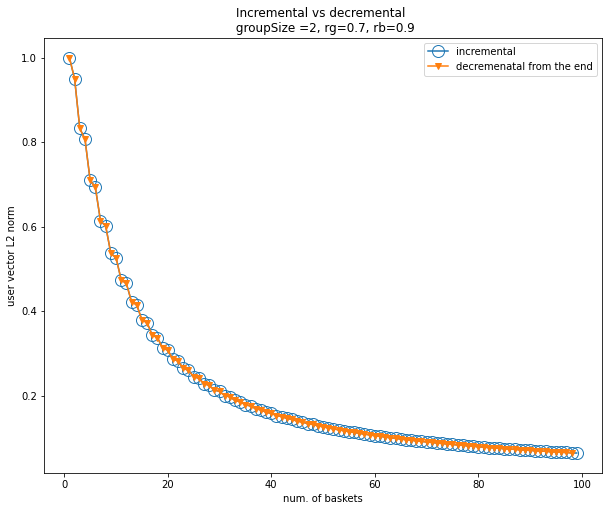

In [197]:
# this is the decremental from end data
eval_df = pd.read_csv("../eval_results/time_2021-03-23-17-01.csv",
                      header=None, 
                      names=["batchId", "seconds", "groupSize", "rg", "rb", "val"])
inc_df = eval_df.iloc[0:99]
dec_df = eval_df.iloc[99:-1]
fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
ax.plot(inc_df.batchId + 1, inc_df.val, label="incremental",  marker='o', markersize=12, markerfacecolor='none')
ax.plot(197-dec_df.batchId, dec_df.val, label="decremenatal from the end",  marker='v')
ax.set_title('Incremental vs decremental \n groupSize =2, rg=0.7, rb=0.9')
ax.set_xlabel("num. of baskets")
ax.set_ylabel("user vector L2 norm")
ax.legend();

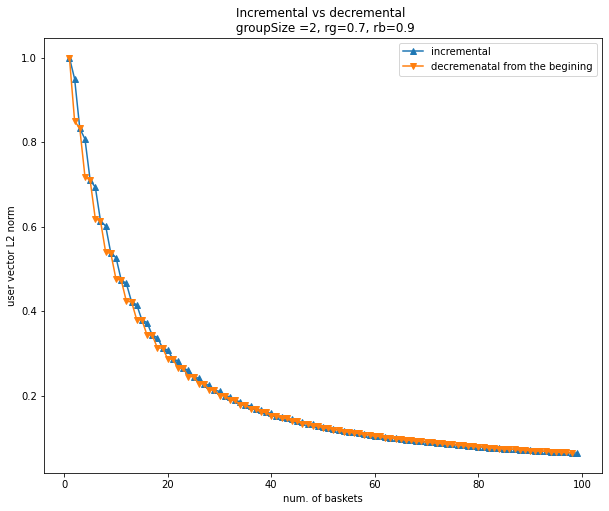

In [199]:
# this is the decremental from begining data
eval_df = pd.read_csv("../eval_results/time_2021-03-23-17-09.csv",
                      header=None, 
                      names=["batchId", "seconds", "groupSize", "rg", "rb", "val"])
inc_df = eval_df.iloc[0:99]
dec_df = eval_df.iloc[99:-1]
fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
ax.plot(inc_df.batchId + 1, inc_df.val, label="incremental",  marker='^')
ax.plot(197-dec_df.batchId, dec_df.val, label="decremenatal from the begining",  marker='v')
ax.set_title('Incremental vs decremental \n groupSize =2, rg=0.7, rb=0.9')
ax.set_xlabel("num. of baskets")
ax.set_ylabel("user vector L2 norm")
ax.legend();

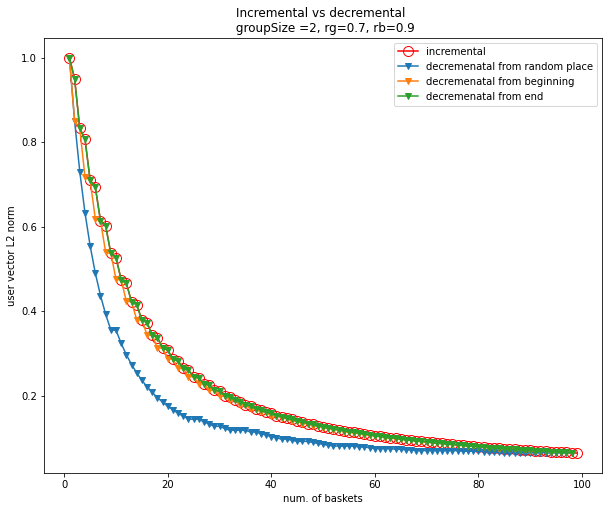

In [3]:
# 2021-03-24 dont touch this!


# this is the decremental from random
eval_df_random = pd.read_csv("../eval_results/time_2021-03-23-17-27.csv",
                      header=None, 
                      names=["batchId", "seconds", "groupSize", "rg", "rb", "val"])
inc_df_random = eval_df_random.iloc[0:99]
dec_df_random = eval_df_random.iloc[99:-1]

# this is the decremental from begining data
eval_df_beginning = pd.read_csv("../eval_results/time_2021-03-23-17-09.csv",
                      header=None, 
                      names=["batchId", "seconds", "groupSize", "rg", "rb", "val"])
inc_df_beginning = eval_df_beginning.iloc[0:99]
dec_df_beginning = eval_df_beginning.iloc[99:-1]

# this is the decremental from end data

eval_df_end = pd.read_csv("../eval_results/time_2021-03-23-17-01.csv",
                      header=None, 
                      names=["batchId", "seconds", "groupSize", "rg", "rb", "val"])
inc_df_end = eval_df_end.iloc[0:99]
dec_df_end = eval_df_end.iloc[99:-1]


fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()

ax.plot(inc_df_random.batchId + 1, inc_df_random.val, label="incremental",
        marker='o', markerfacecolor='none', markersize=10, color="r")
ax.plot(197-dec_df_random.batchId, dec_df_random.val, label="decremenatal from random place",  marker='v')

ax.plot(197-dec_df_beginning.batchId, dec_df_beginning.val, label="decremenatal from beginning",  marker='v')

ax.plot(197-dec_df_end.batchId, dec_df_end.val, label="decremenatal from end",  marker='v')


ax.set_title('Incremental vs decremental \n groupSize =2, rg=0.7, rb=0.9')
ax.set_xlabel("num. of baskets")
ax.set_ylabel("user vector L2 norm")
ax.legend();

# When basket count = 100

- This is totally as excepected, because the decremental process starts from the end, no group composition is changed, we have perfect estimation of user vector values.

In [14]:
eval_df2 = pd.read_csv("../temp/output_batch_time_2021-03-24-22-38.csv")
eval_df2

,batchId,ms,groupSize,rg,rb,userVectorFirstEle,lastGroupVectorFirstEle
0,0.0,1950.408300,2.0,0.7,0.9,1.000000,1.00
1,1.0,777.782390,2.0,0.7,0.9,0.950000,0.95
2,2.0,405.163847,2.0,0.7,0.9,0.832500,1.00
3,3.0,364.591493,2.0,0.7,0.9,0.807500,0.95
4,4.0,333.516774,2.0,0.7,0.9,0.710167,1.00
...,...,...,...,...,...,...,...
195,195.0,104.254535,2.0,0.7,0.9,0.807500,0.95
196,196.0,156.246475,2.0,0.7,0.9,0.832500,1.00
197,197.0,109.701608,2.0,0.7,0.9,0.950000,0.95
198,198.0,115.001278,2.0,0.7,0.9,1.000000,1.00


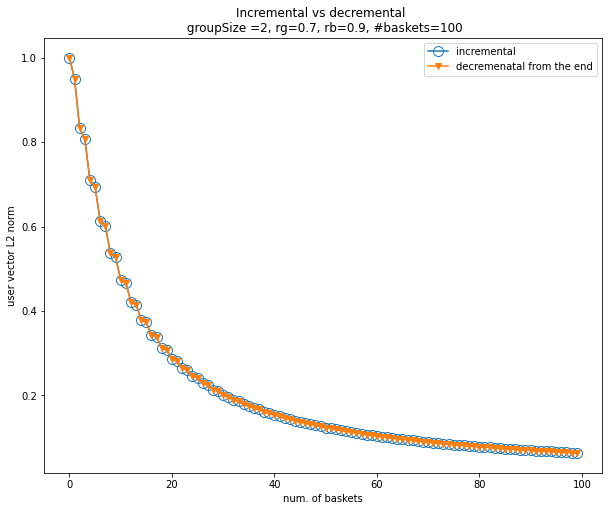

In [184]:
# this is the decremental from begining data
eval_df100 = pd.read_csv("../temp/output_batch_time_2021-03-24-22-38.csv")
inc_df100 = eval_df100.iloc[0:100]
dec_df100 = eval_df100.iloc[99:-1]
fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
ax.plot(inc_df100.batchId , inc_df100.userVectorFirstEle, label="incremental",  marker='o',
        markerfacecolor='none', markersize=10)
ax.plot(198-dec_df100.batchId, dec_df100.userVectorFirstEle, label="decremenatal from the end",  marker='v')
ax.set_title('Incremental vs decremental \n groupSize =2, rg=0.7, rb=0.9, #baskets=100')
ax.set_xlabel("num. of baskets")
ax.set_ylabel("user vector L2 norm")
ax.legend();

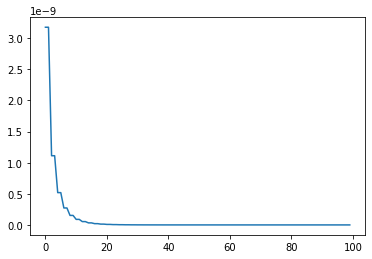

In [180]:
inc_array = inc_df2.userVectorFirstEle.to_numpy()

dec_array = dec_df2.userVectorFirstEle.to_numpy()

err = dec_array[::-1] - inc_array
plt.plot(err)

# explosion issue basket count = 200

- Strange enough, the further we decrement the baskets, when we have less and less baskets left, the decremental
user vector value start to explode explonetially.

- Why does this happen??

- Maybe we should clamp the value to less than 1？


In [185]:
eval_df200 = pd.read_csv("../temp/output_batch_time_2021-03-24-22-53.csv")
eval_df200

,batchId,ms,groupSize,rg,rb,userVectorFirstEle,lastGroupVectorFirstEle
0,0.0,1935.389188,2.0,0.7,0.9,1.000000,1.00
1,1.0,474.517416,2.0,0.7,0.9,0.950000,0.95
2,2.0,406.411893,2.0,0.7,0.9,0.832500,1.00
3,3.0,445.693554,2.0,0.7,0.9,0.807500,0.95
4,4.0,351.117823,2.0,0.7,0.9,0.710167,1.00
...,...,...,...,...,...,...,...
395,395.0,112.492940,2.0,0.7,0.9,1.101827,0.95
396,396.0,114.578874,2.0,0.7,0.9,1.126827,1.00
397,397.0,137.185900,2.0,0.7,0.9,1.790934,0.95
398,398.0,121.181581,2.0,0.7,0.9,1.840934,1.00


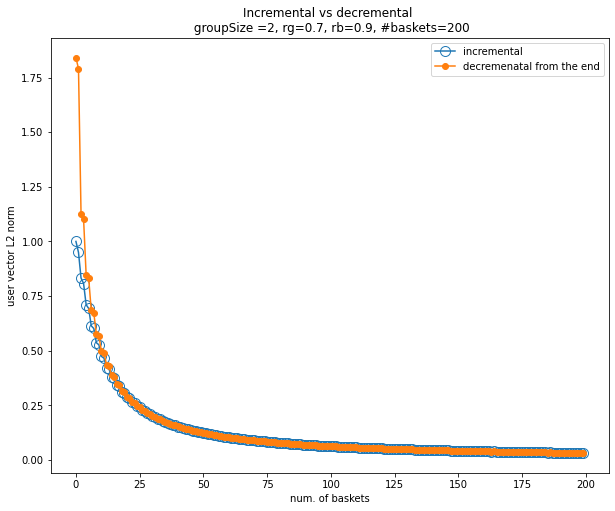

In [188]:
# this is the decremental from begining data
eval_df200 = pd.read_csv("../temp/output_batch_time_2021-03-24-22-53.csv")
inc_df200 = eval_df200.iloc[0:200]
dec_df200 = eval_df200.iloc[199:-1] # we start counting from 200 -1 to share the last value
fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
ax.plot(inc_df200.batchId , inc_df200.userVectorFirstEle, label="incremental",  marker='o',
        markerfacecolor='none', markersize=10)
ax.plot(398-dec_df200.batchId, dec_df200.userVectorFirstEle, label="decremenatal from the end",  marker='o') # 2*200-2

#### uncomment if you want to plot 100 baskets together in #
# ax.plot(inc_df2.batchId , inc_df2.userVectorFirstEle, label="incremental",  marker='o',
#         markerfacecolor='none', markersize=10)
# ax.plot(198-dec_df2.batchId, dec_df2.userVectorFirstEle, label="decremenatal from the end",  marker='v')

ax.set_title('Incremental vs decremental \n groupSize =2, rg=0.7, rb=0.9, #baskets=200')
ax.set_xlabel("num. of baskets")
ax.set_ylabel("user vector L2 norm")
ax.legend();

# error comparison: ill-condition decremenal case due to >1 coefficient


- As we can see, the numeric error increases exponentially, this will limit us from incrementing baskets for users
with many baskets

In [268]:
# # error for 100 baskets


# # inc_array100 = inc_df100.userVectorFirstEle.to_numpy()

# # dec_array100 = dec_df100.userVectorFirstEle.to_numpy()



# # error for 200 baskets
# eval_df200 = pd.read_csv("../temp/output_batch_time_2021-03-31-11-44.csv")
# inc_df200 = eval_df200.iloc[0:1000]
# dec_df200 = eval_df200.iloc[999:-1] # we start counting from 200 -1 to share the last value

# inc_array200 = inc_df200.userVectorFirstEle.to_numpy()

# dec_array200 = dec_df200.userVectorFirstEle.to_numpy()

# ax = plt.subplot()


# # err100 = dec_array100[::-1] - inc_array100
# # ax.plot(err100, label="error for basket 100")

# err200 = dec_array200[::-1] - inc_array200
# ax.plot(err200, label="error for basket")

# ax.set_xlabel("#baskets left")
# ax.set_ylabel("#error")
# ax.legend()

# recompute everytime to the rescue

- Now in the decremental case, we recompute every time to avoid numerical instability


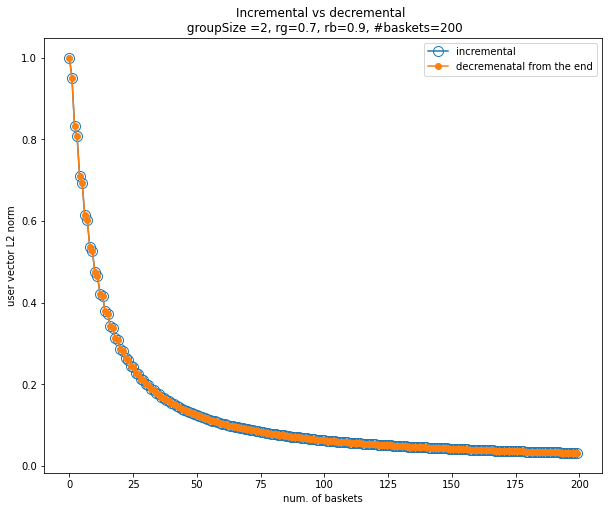

In [60]:
# this is the decremental from begining data
eval_df2 = pd.read_csv("../temp/output_batch_time_2021-03-25-11-11.csv")
inc_df = eval_df2.iloc[0:200]
dec_df = eval_df2.iloc[199:-1] # we start counting from 200 -1 to share the last value
fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
ax.plot(inc_df.batchId , inc_df.userVectorFirstEle, label="incremental",  marker='o',
        markerfacecolor='none', markersize=10)
ax.plot(398-dec_df.batchId, dec_df.userVectorFirstEle, label="decremenatal from the end",  marker='o') # 2*200-2

#### uncomment if you want to plot 100 baskets together in #
# ax.plot(inc_df2.batchId , inc_df2.userVectorFirstEle, label="incremental",  marker='o',
#         markerfacecolor='none', markersize=10)
# ax.plot(198-dec_df2.batchId, dec_df2.userVectorFirstEle, label="decremenatal from the end",  marker='v')

ax.set_title('Incremental vs decremental \n groupSize =2, rg=0.7, rb=0.9, #baskets=200')
ax.set_xlabel("num. of baskets")
ax.set_ylabel("user vector L2 norm")
ax.legend();


- Now in the decremental case, we recompute every time to avoid numerical instability


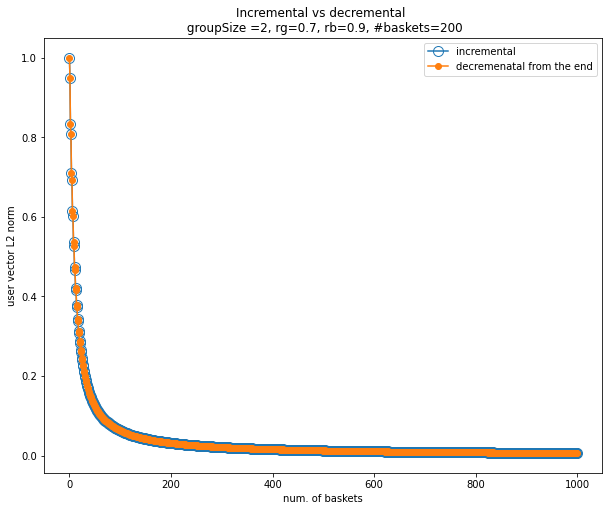

In [61]:
# this is the decremental from begining data
eval_df2 = pd.read_csv("../temp/output_batch_time_2021-03-25-12-05.csv")
inc_df = eval_df2.iloc[0:1000]
dec_df = eval_df2.iloc[999:-1] # we start counting from 200 -1 to share the last value
fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
ax.plot(inc_df.batchId , inc_df.userVectorFirstEle, label="incremental",  marker='o',
        markerfacecolor='none', markersize=10)
ax.plot(2000-2-dec_df.batchId, dec_df.userVectorFirstEle, label="decremenatal from the end",  marker='o') # 2*200-2

#### uncomment if you want to plot 100 baskets together in #
# ax.plot(inc_df2.batchId , inc_df2.userVectorFirstEle, label="incremental",  marker='o',
#         markerfacecolor='none', markersize=10)
# ax.plot(198-dec_df2.batchId, dec_df2.userVectorFirstEle, label="decremenatal from the end",  marker='v')

ax.set_title('Incremental vs decremental \n groupSize =2, rg=0.7, rb=0.9, #baskets=200')
ax.set_xlabel("num. of baskets")
ax.set_ylabel("user vector L2 norm")
ax.legend();

# baseline incremental case

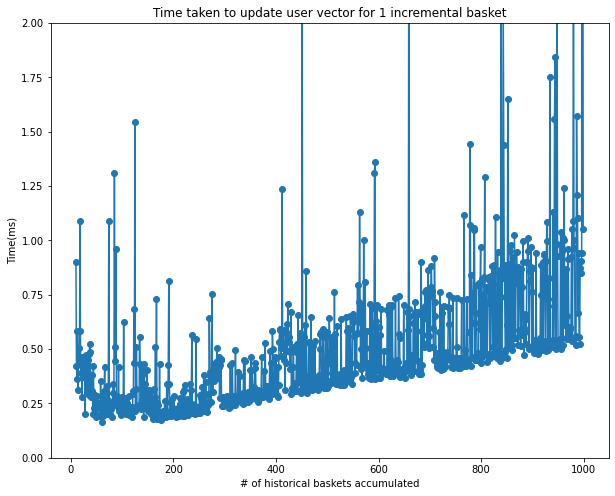

In [157]:
# inc_df = state_update_df.iloc[0:1000]
# this is the decremental from begining data
state_update_df = pd.read_csv("../temp/state_update_time_2021-03-25-14-07.csv")
state_update_df

inc_df = state_update_df.iloc[10:1000] # we start counting from 200 -1 to share the last value
# dec_df = dec_df.reset_index()
fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
# ax.plot(inc_df.index , inc_df.ms, label="incremental",  marker='o',
#         markerfacecolor='none', markersize=10)
ax.plot( inc_df.ms, label="decremenatal from the end",  marker='o') # 2*200-2

ax.set_xlabel("# of historical baskets accumulated")
ax.set_ylabel("Time(ms)")
ax.set_ylim([0,2])
ax.set_title("Time taken to update user vector for 1 incremental basket");

# Baseline decremental case

- In the decremental case, we expect the time taken to update the state to be linearly proportional to the number of baskets left

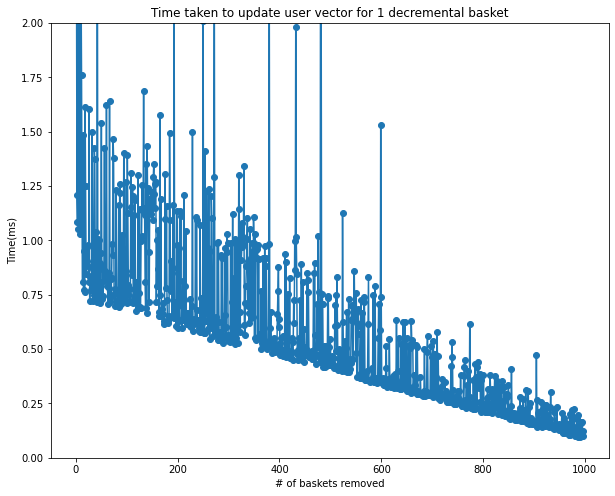

In [244]:
# inc_df = state_update_df.iloc[0:1000]
# this is the decremental from end data
state_update_df = pd.read_csv("../temp/state_update_time_2021-03-25-12-05.csv")
state_update_df

dec_df_baseline = state_update_df.iloc[1001:-1] # we start counting from 200 -1 to share the last value
dec_df_baseline = dec_df_baseline.reset_index()
fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
# ax.plot(inc_df.index , inc_df.ms, label="incremental",  marker='o',
#         markerfacecolor='none', markersize=10)
ax.plot(dec_df_baseline.ms, label="decremenatal from the end",  marker='o') # 2*200-2

ax.set_xlabel("# of baskets removed")
ax.set_ylabel("Time(ms)")
ax.set_ylim([0,2])
ax.set_title("Time taken to update user vector for 1 decremental basket");

# Improved incremental case

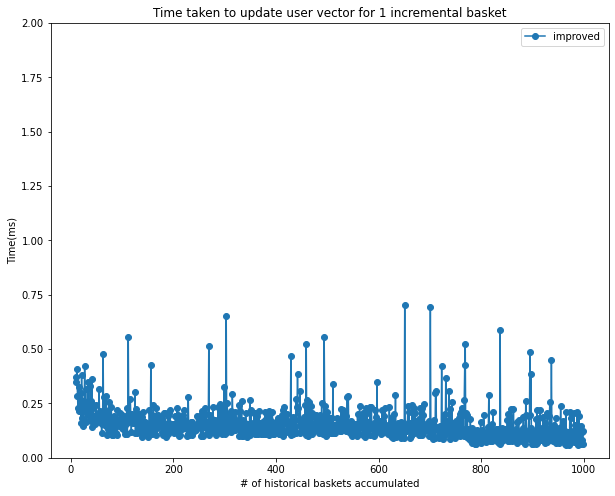

In [269]:
# inc_df = state_update_df.iloc[0:1000]
# this is the decremental from begining data
state_update_df = pd.read_csv("../temp/state_update_time_2021-03-25-14-59.csv")
state_update_df

inc_df_im = state_update_df.iloc[10:] # we start counting from 200 -1 to share the last value
# dec_df = dec_df.reset_index()
fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
# ax.plot(inc_df.index , inc_df.ms, label="incremental",  marker='o',
#         markerfacecolor='none', markersize=10)
ax.plot( inc_df_im.ms, label="improved",  marker='o') # 2*200-2

# this is the baseline data
# state_update_df = pd.read_csv("../temp/state_update_time_2021-03-25-14-07.csv")
# inc_df = state_update_df.iloc[10:1000] # we start counting from 200 -1 to share the last value
# ax.plot( inc_df.ms, label="baseline",  marker='o') # 2*200-2


ax.set_xlabel("# of historical baskets accumulated")
ax.set_ylabel("Time(ms)")
ax.set_ylim([0,2])
ax.set_title("Time taken to update user vector for 1 incremental basket");
ax.legend()

# Improved decremetal case

we start removing basket from the very end, we expect the time taken to be relatively constant

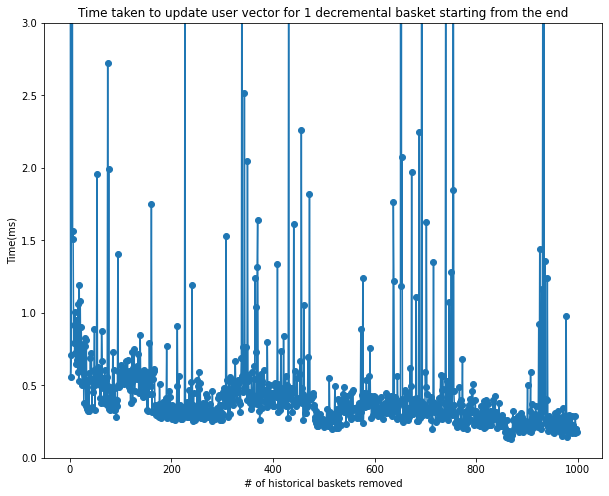

In [246]:
# inc_df = state_update_df.iloc[0:1000]

state_update_df = pd.read_csv("../temp/state_update_time_2021-03-26-10-37.csv")
state_update_df

dec_df = state_update_df.iloc[1000:-1] # we start counting from 200 -1 to share the last value
dec_df = dec_df.reset_index()
fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
# ax.plot(inc_df.index , inc_df.ms, label="incremental",  marker='o',
#         markerfacecolor='none', markersize=10)
ax.plot( dec_df.ms, label="decremenatal from the end",  marker='o') # 2*200-2

ax.set_xlabel("# of historical baskets removed")
ax.set_ylabel("Time(ms)")
ax.set_ylim([0,3])
ax.set_title("Time taken to update user vector for 1 decremental basket starting from the end");

we then look at removing basket from the very beginning, we expect the time taken to be longer at the beginning, and linearly going down, because of the number of baskets left to process

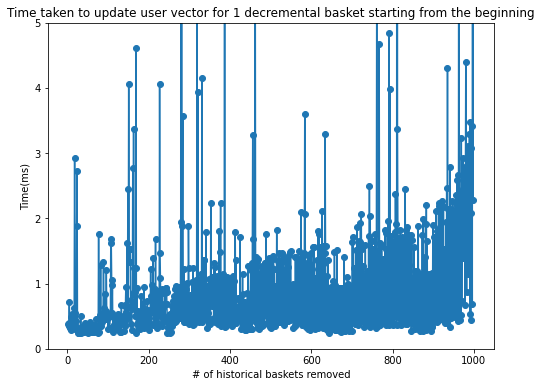

In [247]:
# inc_df = state_update_df.iloc[0:1000]

state_update_df = pd.read_csv("../temp/state_update_time_2021-03-26-11-15.csv")
state_update_df

dec_df = state_update_df.iloc[1000:-1] # we start counting from 200 -1 to share the last value
dec_df = dec_df.reset_index()
fig = plt.figure(figsize=(8,6))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
# ax.plot(inc_df.index , inc_df.ms, label="incremental",  marker='o',
#         markerfacecolor='none', markersize=10)
ax.plot( np.arange(1000,1,-1), dec_df.ms, label="decremenatal from the end",  marker='o') # 2*200-2

ax.set_xlabel("# of historical baskets removed")
ax.set_ylabel("Time(ms)")
ax.set_ylim([0,5]);
ax.set_title("Time taken to update user vector for 1 decremental basket starting from the beginning");

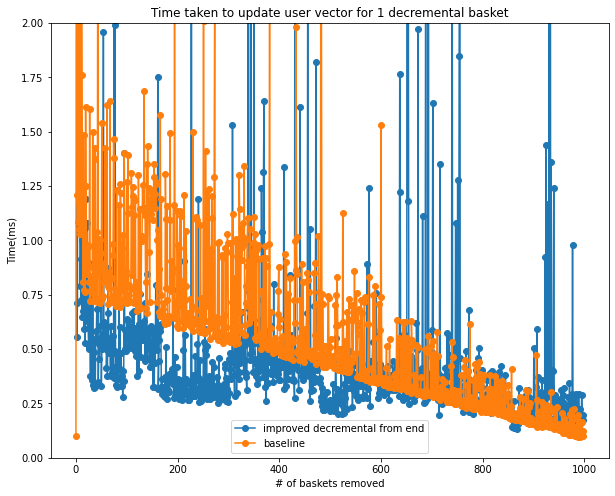

In [261]:
# this is the baseline decremental
state_update_df = pd.read_csv("../temp/state_update_time_2021-03-25-12-05.csv")
dec_df_baseline = state_update_df.iloc[1000:-1] # we start counting from 200 -1 to share the last value
dec_df_baseline = dec_df_baseline.reset_index()


# this is the improved decremental from the end
state_update_df = pd.read_csv("../temp/state_update_time_2021-03-26-10-37.csv")
dec_df_improved_from_end = state_update_df.iloc[1000:-1] # we start counting from 200 -1 to share the last value
dec_df_improved_from_end = dec_df_improved_from_end.reset_index()


# this is the improved decremental from the beginning
state_update_df = pd.read_csv("../temp/state_update_time_2021-03-26-11-15.csv")
dec_df_improved_from_start = state_update_df.iloc[1000:-1] # we start counting from 200 -1 to share the last value
dec_df_improved_from_start = dec_df_improved_from_start.reset_index()



fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
# ax.plot(inc_df.index , inc_df.ms, label="incremental",  marker='o',
#         markerfacecolor='none', markersize=10)
ax.plot(dec_df_improved_from_end.ms, label="improved decremental from end",  marker='o') # 2*200-2

ax.plot(dec_df_baseline.ms, label="baseline",  marker='o') # 2*200-2


# ax.plot(dec_df_improved_from_start.ms, label="improved decremental from start",  marker='o') # 2*200-2

ax.set_xlabel("# of baskets removed")
ax.set_ylabel("Time(ms)")
ax.set_ylim([0,2])
ax.set_title("Time taken to update user vector for 1 decremental basket");
ax.legend()

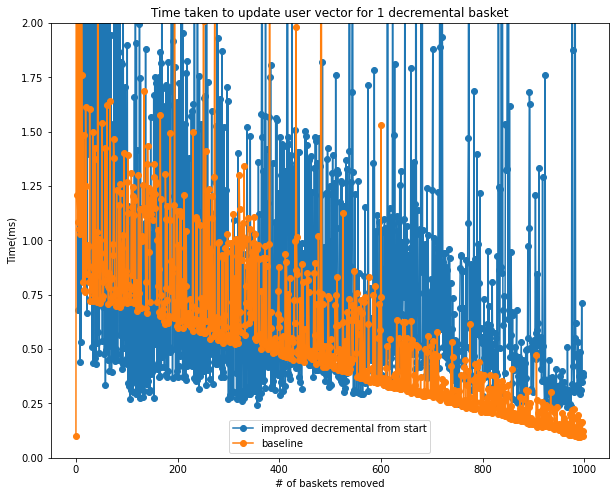

In [262]:
# this is the baseline decremental
state_update_df = pd.read_csv("../temp/state_update_time_2021-03-25-12-05.csv")
dec_df_baseline = state_update_df.iloc[1000:-1] # we start counting from 200 -1 to share the last value
dec_df_baseline = dec_df_baseline.reset_index()


# this is the improved decremental from the end
state_update_df = pd.read_csv("../temp/state_update_time_2021-03-26-10-37.csv")
dec_df_improved_from_end = state_update_df.iloc[1000:-1] # we start counting from 200 -1 to share the last value
dec_df_improved_from_end = dec_df_improved_from_end.reset_index()


# this is the improved decremental from the beginning
state_update_df = pd.read_csv("../temp/state_update_time_2021-03-26-11-15.csv")
dec_df_improved_from_start = state_update_df.iloc[1000:-1] # we start counting from 200 -1 to share the last value
dec_df_improved_from_start = dec_df_improved_from_start.reset_index()



fig = plt.figure(figsize=(10,8))
# horizontal axis is number of baskets, the first line is incremental vector value, 
# second line is the decremental version, ideally they should be exactly the same
ax = plt.subplot()
# ax.plot(inc_df.index , inc_df.ms, label="incremental",  marker='o',
#         markerfacecolor='none', markersize=10)
ax.plot(dec_df_improved_from_start.ms, label="improved decremental from start",  marker='o') # 2*200-2

ax.plot(dec_df_baseline.ms, label="baseline",  marker='o') # 2*200-2


# ax.plot(dec_df_improved_from_start.ms, label="improved decremental from start",  marker='o') # 2*200-2

ax.set_xlabel("# of baskets removed")
ax.set_ylabel("Time(ms)")
ax.set_ylim([0,2])
ax.set_title("Time taken to update user vector for 1 decremental basket");
ax.legend()